## 3. sales.csv [파일] - 메타(Meta) 정보
ID : 실제 판매되고 있는 고유 ID<br>
제품 : 제품 코드<br>
대분류 : 제품의 대분류 코드<br>
중분류 : 제품의 중분류 코드<br>
소분류 : 제품의 소분류 코드<br>
브랜드 : 제품의 브랜드 코드<br>
2022-01-01 ~ 2023-04-04 : 실제 일별 총 판매금액<br>
단, 제품이 동일하여도 판매되고 있는 고유 ID 별로 기재한 분류 정보가 상이할 수 있음<br>
즉 고유 ID가 다르다면, 제품이 같더라도 다른 판매 채널<br><br>

In [6]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")

In [4]:
sales=pd.read_csv("./sales.csv")
print(sales.head(10))

   ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   
3   3  B002-00002-00003  B002-C001-0003  B002-C002-0008  B002-C003-0044   
4   4  B002-00003-00001  B002-C001-0001  B002-C002-0001  B002-C003-0003   
5   5  B002-00003-00002  B002-C001-0001  B002-C002-0001  B002-C003-0003   
6   6  B002-00003-00003  B002-C001-0001  B002-C002-0001  B002-C003-0003   
7   7  B002-00003-00004  B002-C001-0001  B002-C002-0001  B002-C003-0003   
8   8  B002-00003-00005  B002-C001-0001  B002-C002-0001  B002-C003-0003   
9   9  B002-00003-00006  B002-C001-0001  B002-C002-0001  B002-C003-0003   

          브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
0  B002-00001           0           0           0           0  ...   
1  B002-00002           0         

In [11]:
print('데이터 구조는:', sales.shape)
print('데이터 타입은:', sales.dtypes)

데이터 구조는: (15890, 465)
데이터 타입은: ID             int64
제품            object
대분류           object
중분류           object
소분류           object
               ...  
2023-03-31     int64
2023-04-01     int64
2023-04-02     int64
2023-04-03     int64
2023-04-04     int64
Length: 465, dtype: object


In [19]:
re = sales.drop(columns=['브랜드','ID', '대분류', '중분류', '소분류'])
re.head()

,제품,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,B002-00002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-00002-00003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-00003-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print(re.iloc[0:3])

                 제품  2022-01-01  2022-01-02  2022-01-03  2022-01-04  \
0  B002-00001-00001           0           0           0           0   
1  B002-00002-00001           0           0           0           0   
2  B002-00002-00002           0           0           0           0   

   2022-01-05  2022-01-06  2022-01-07  2022-01-08  2022-01-09  ...  \
0           0           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           0           0           0           0           0  ...   

   2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
0           0           0           0           0           0           0   
1           0           0           0       22400       67200       44800   
2           0           0           0           0           0           0   

   2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0           0           0           0           0  
1           0        

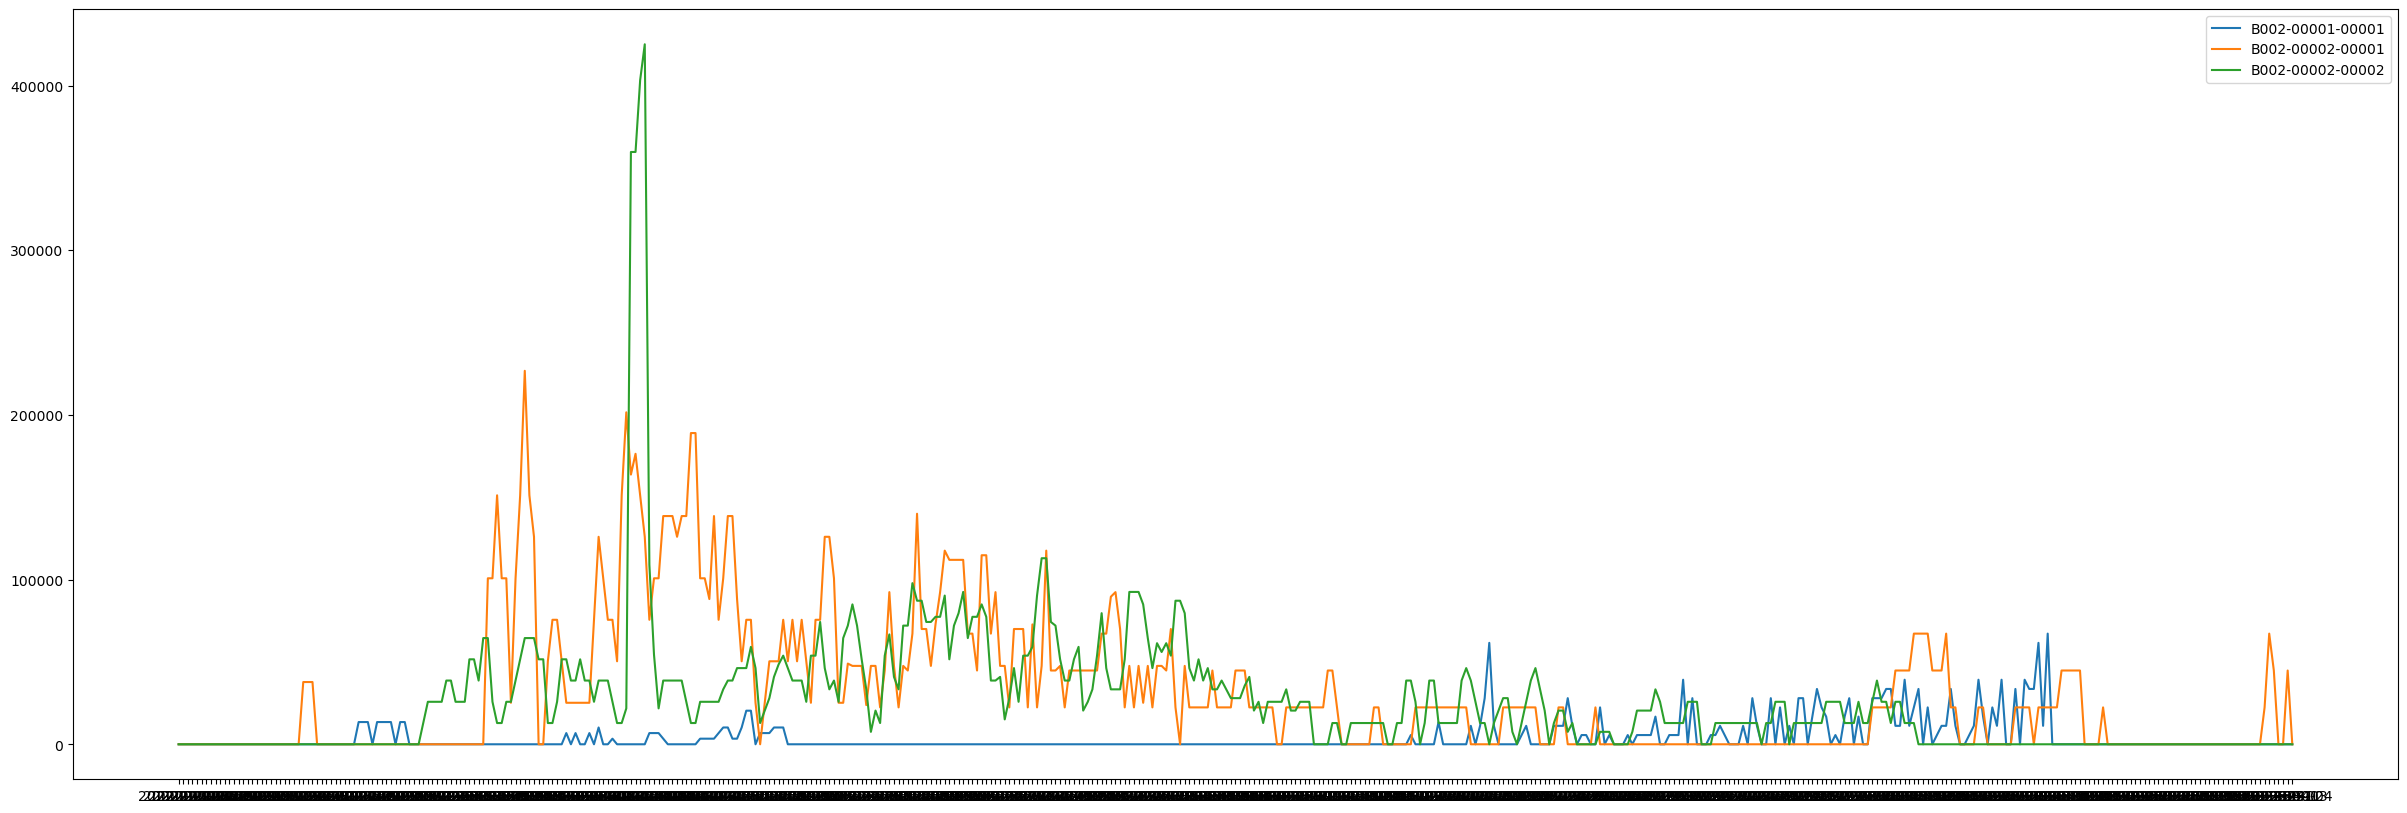

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

for i in range(0, 3):
    product_name = re.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(re.columns[1:], re.iloc[i, 1:], label=product_name)

plt.legend()  # 범례 추가
plt.show()

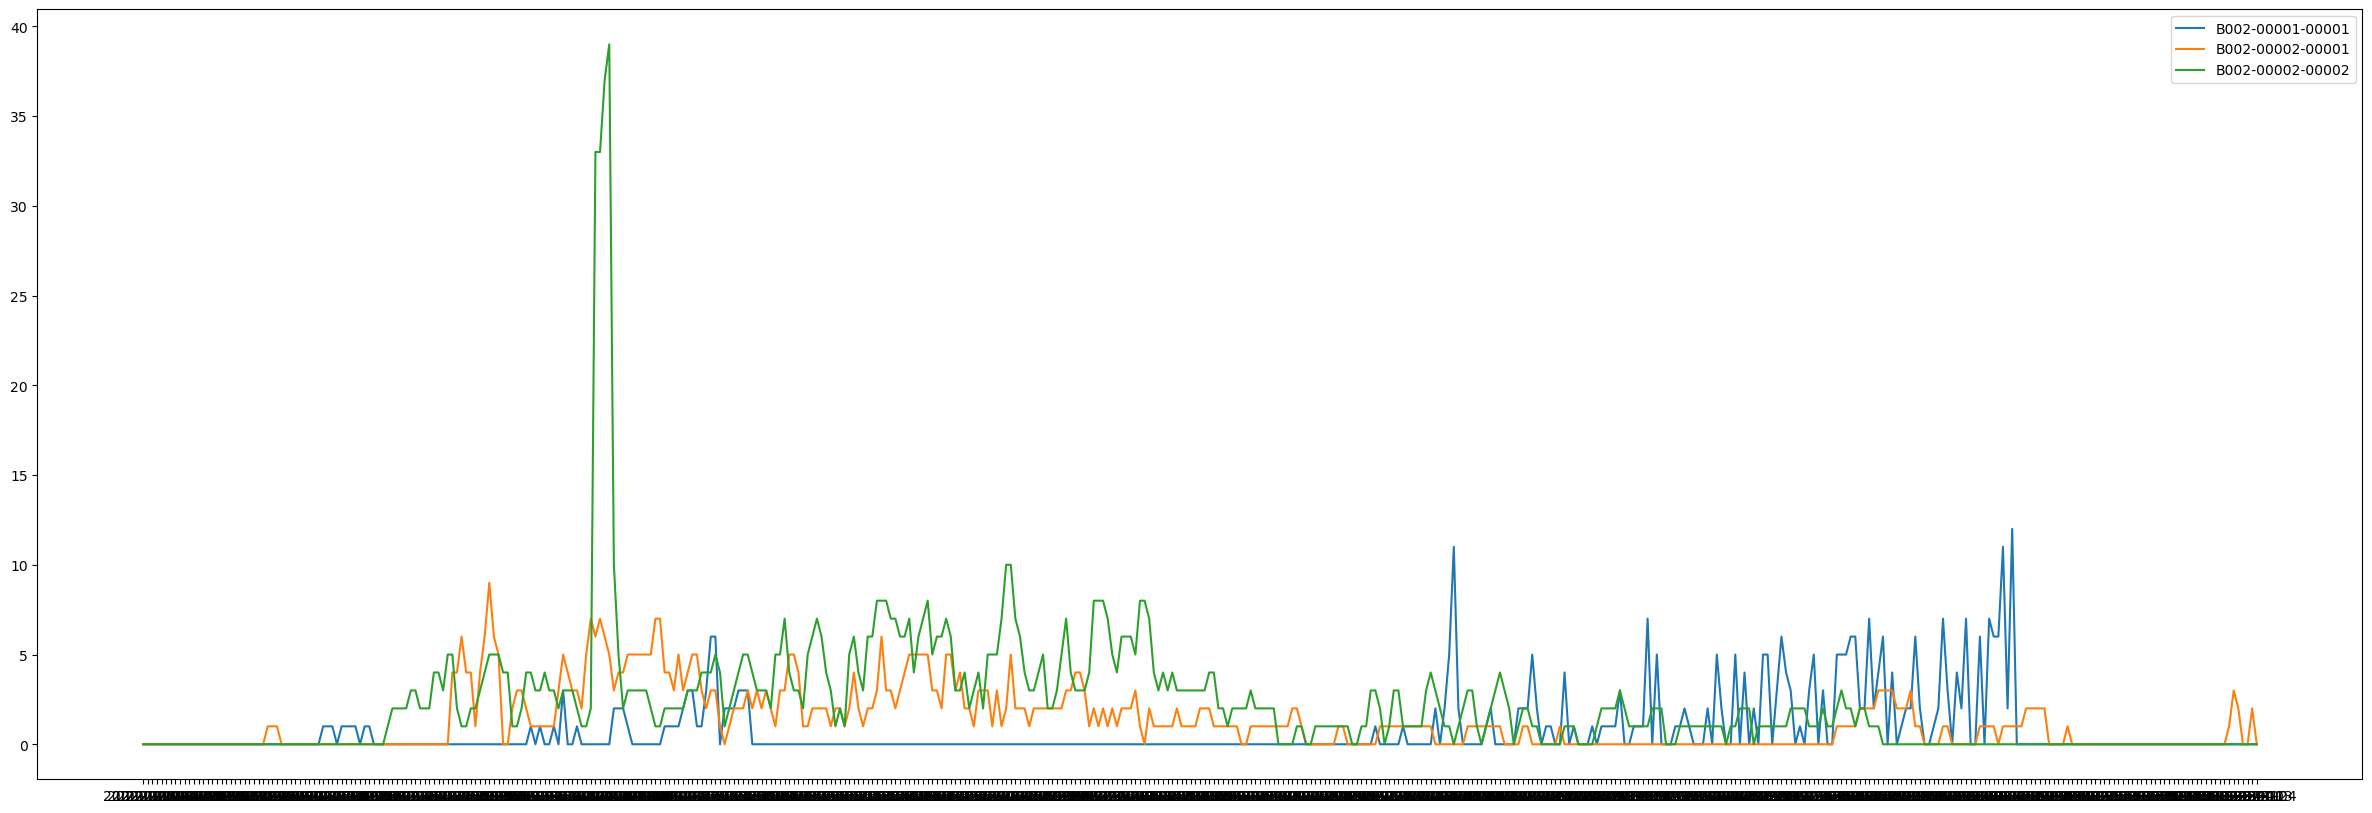

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

for i in range(0, 3):
    product_name = train.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(train.columns[1:], train.iloc[i, 1:], label=product_name)

plt.legend()  # 범례 추가
plt.show()

In [44]:
train=pd.read_csv("./train.csv").drop(columns=['브랜드','ID', '대분류', '중분류', '소분류'])
train.head(3)

,제품,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-00002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5개 비교

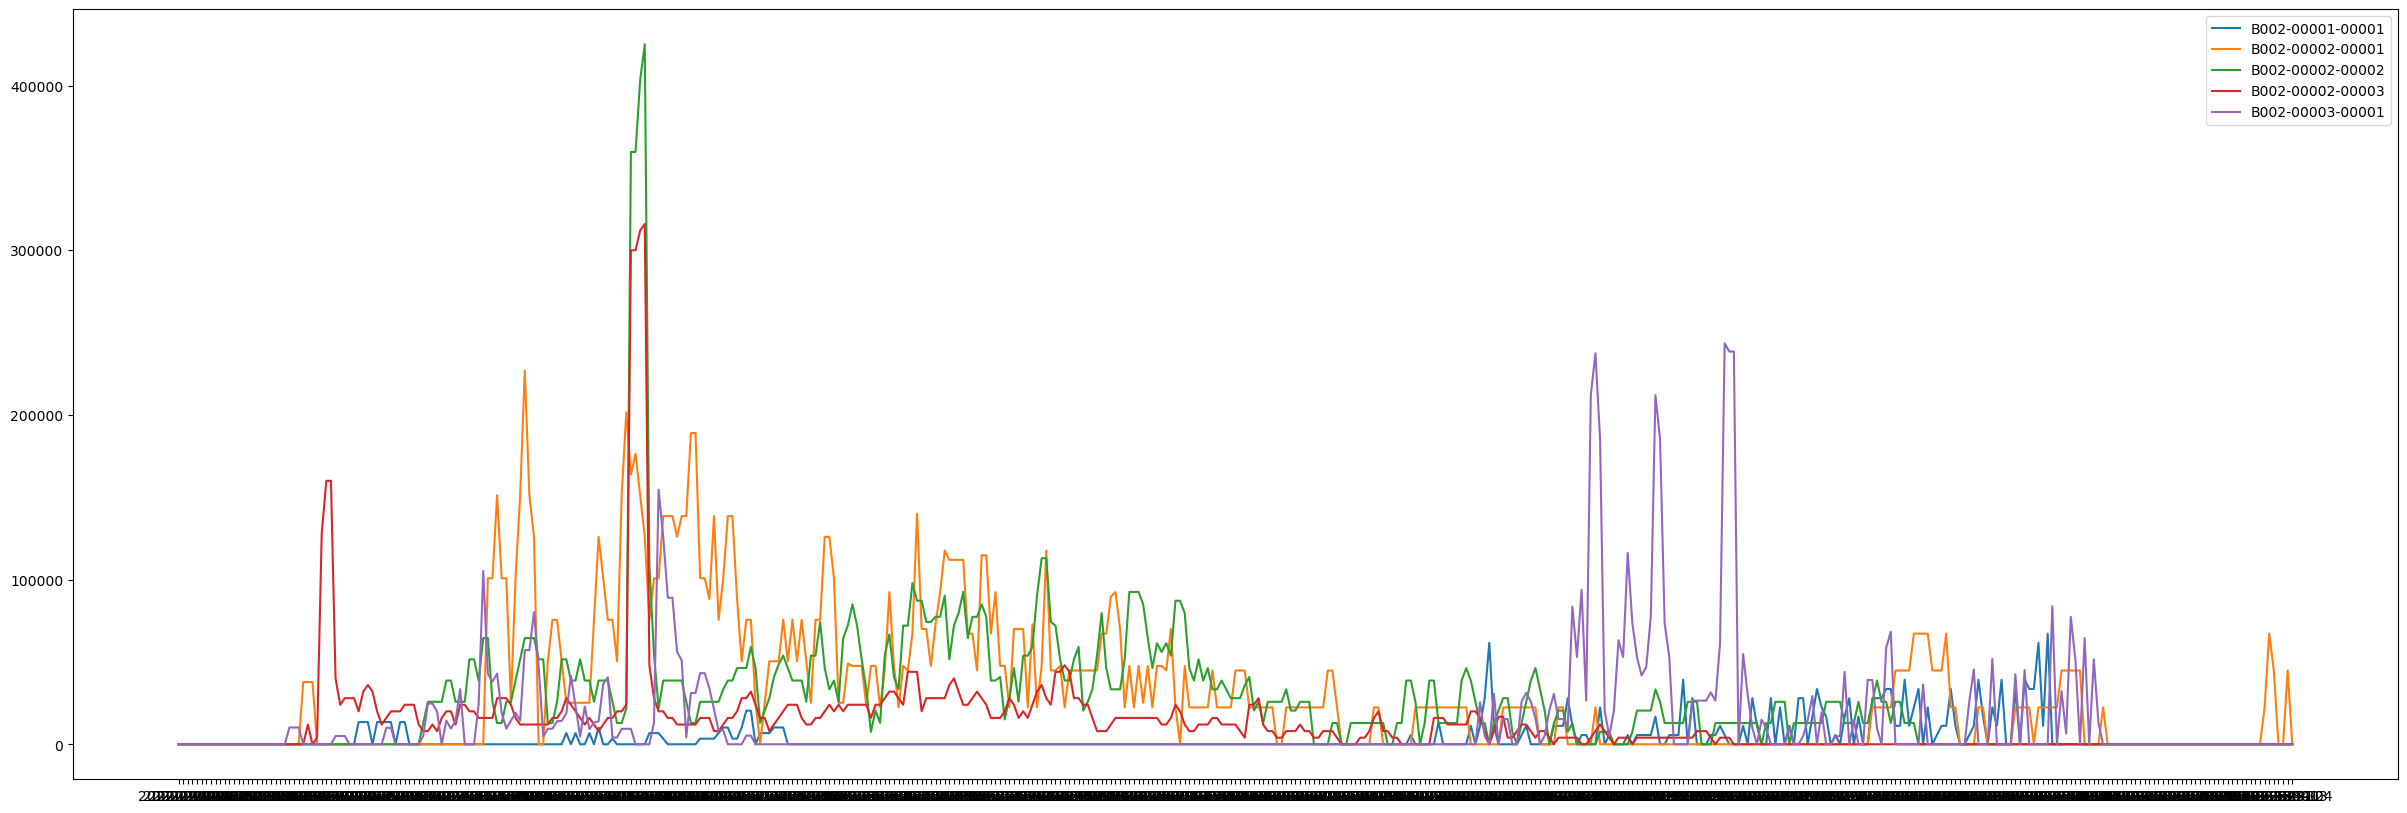

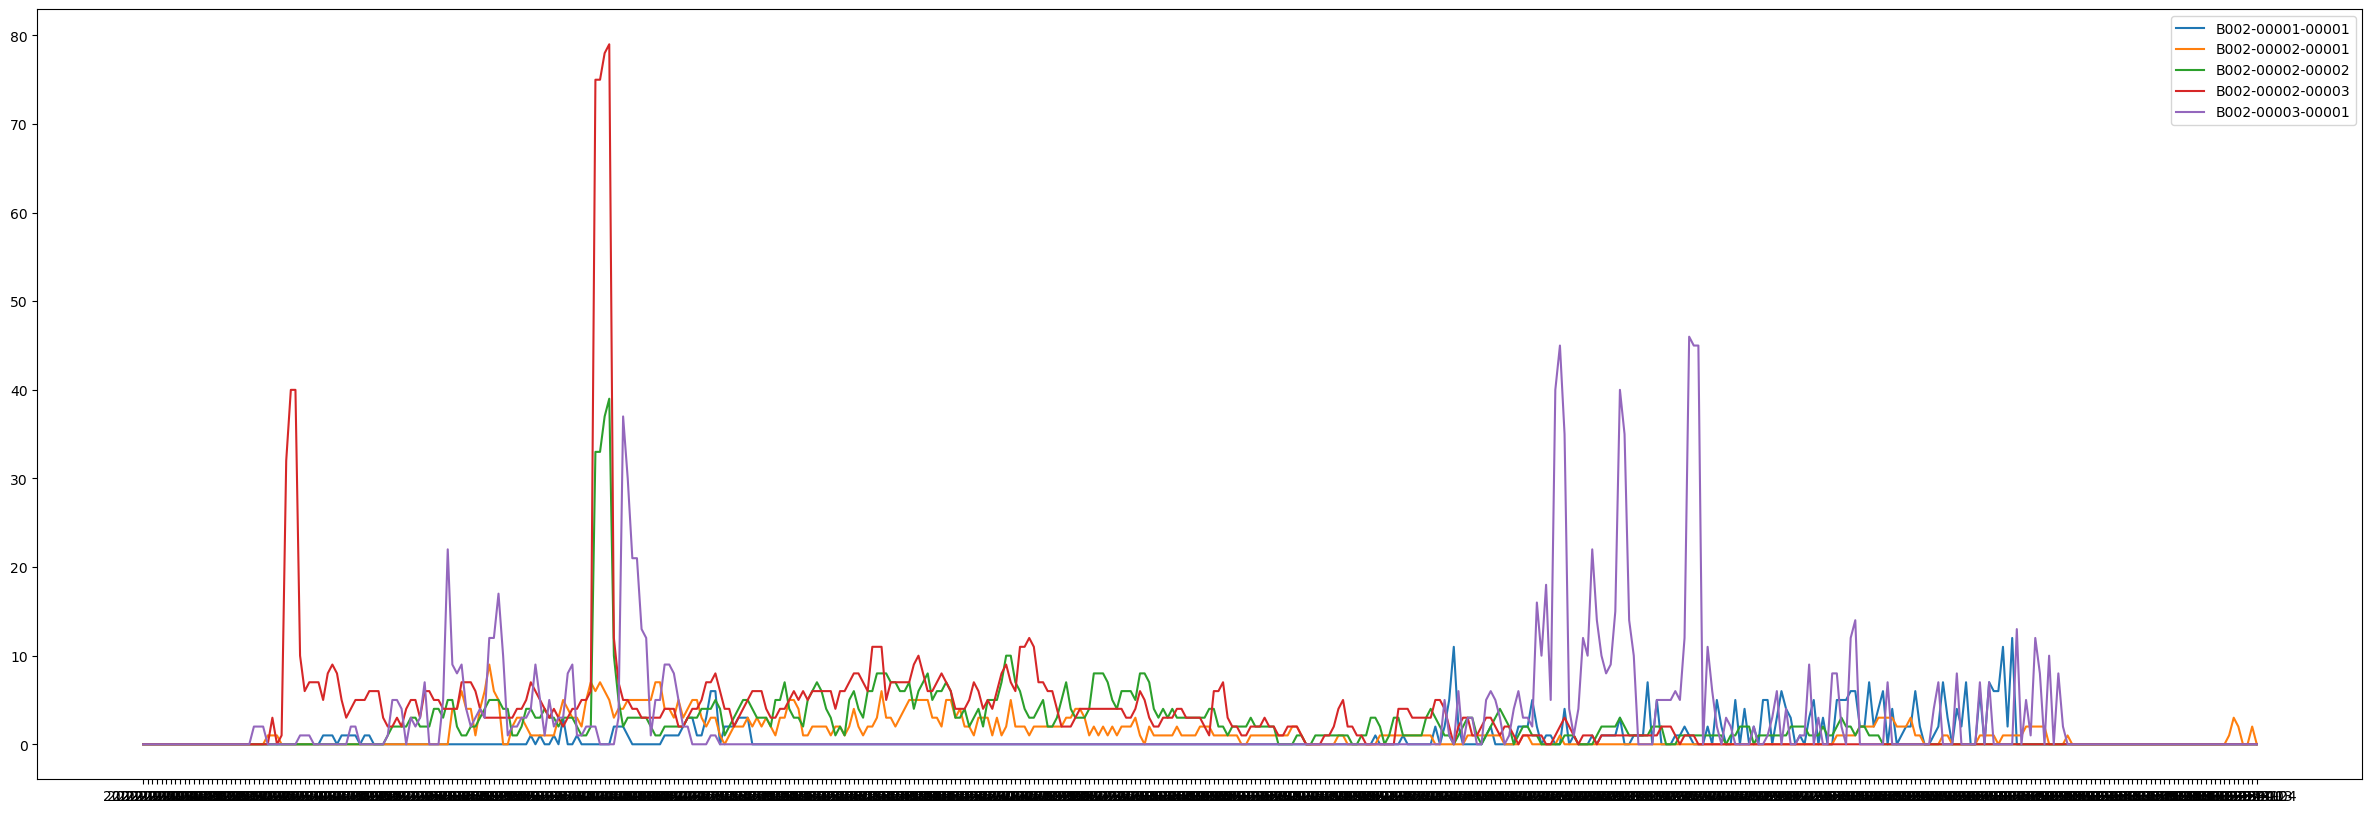

In [47]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
plt.figure(figsize=(30, 10))

for i in range(0, 5):
    product_name = re.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(re.columns[1:], re.iloc[i, 1:], label=product_name)

plt.legend()  # 범례 추가
plt.show()

# 두 번째 그래프
plt.figure(figsize=(30, 10))

for i in range(0, 5):
    product_name = train.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(train.columns[1:], train.iloc[i, 1:], label=product_name)

plt.legend()  # 범례 추가
plt.show()

# 30개 비교

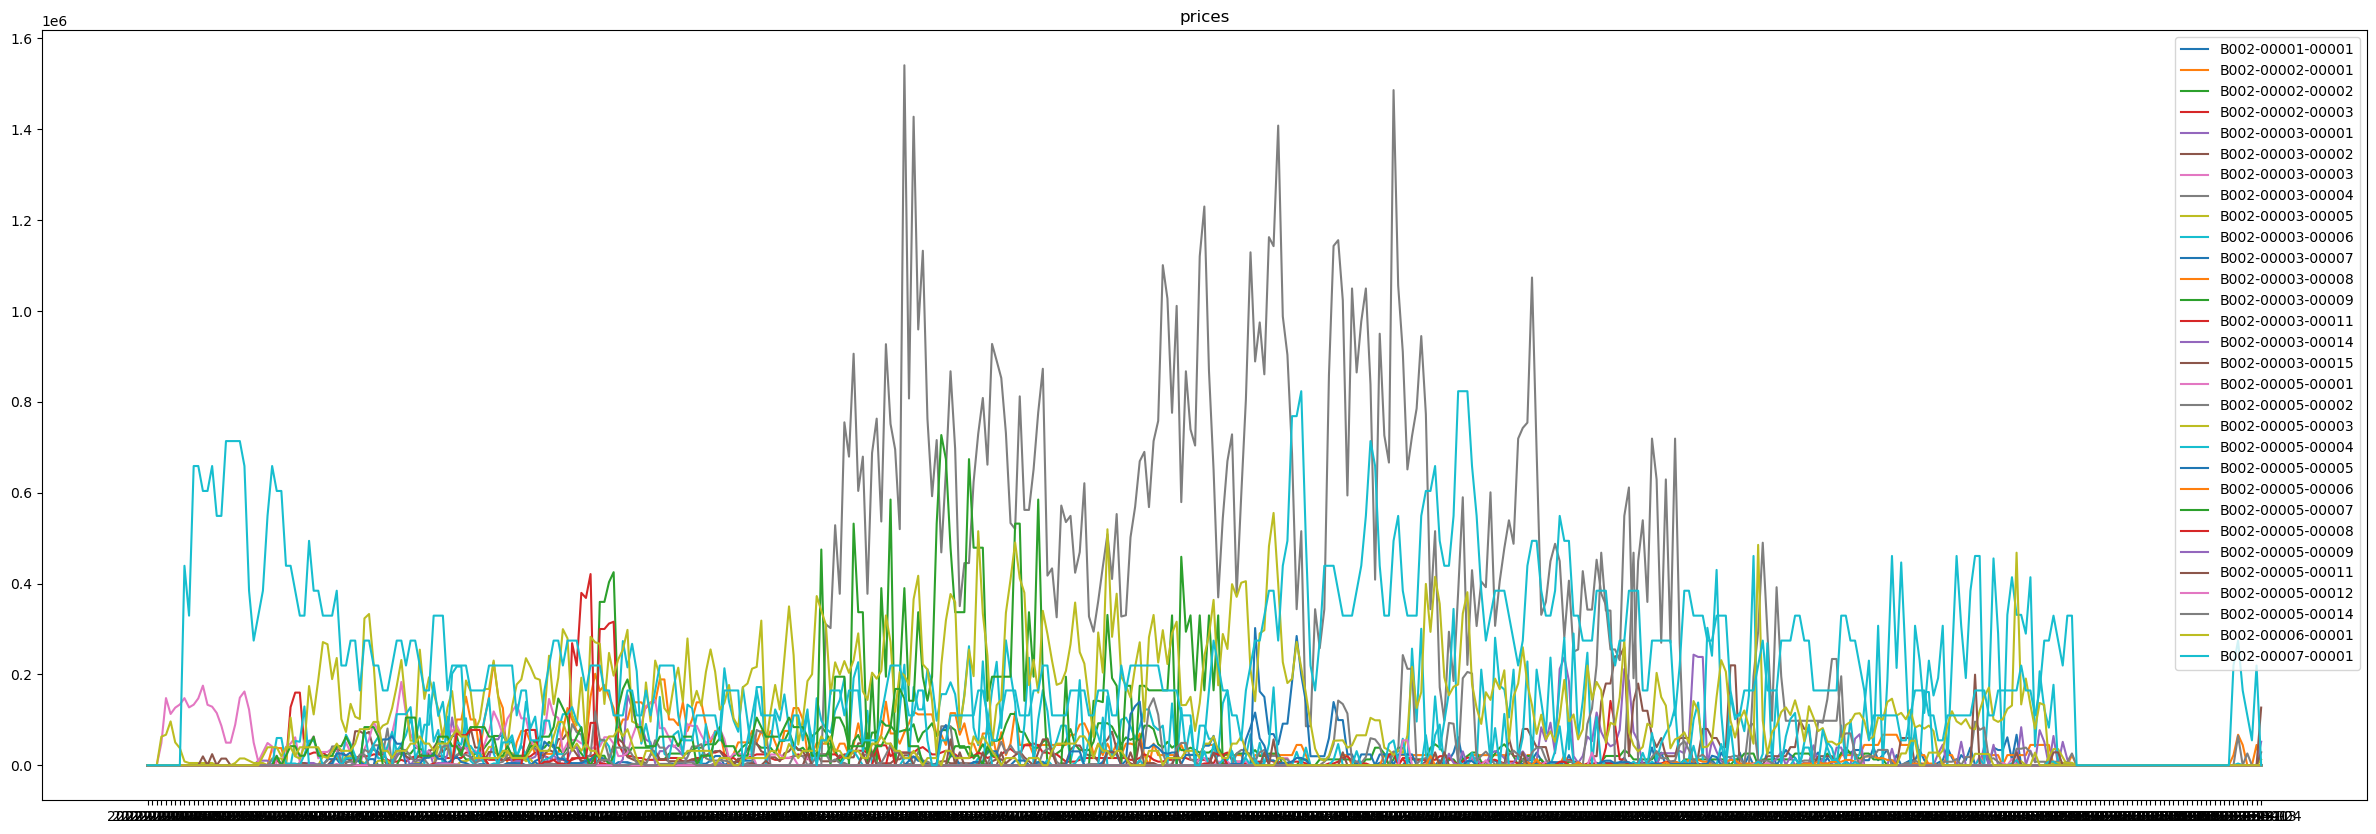

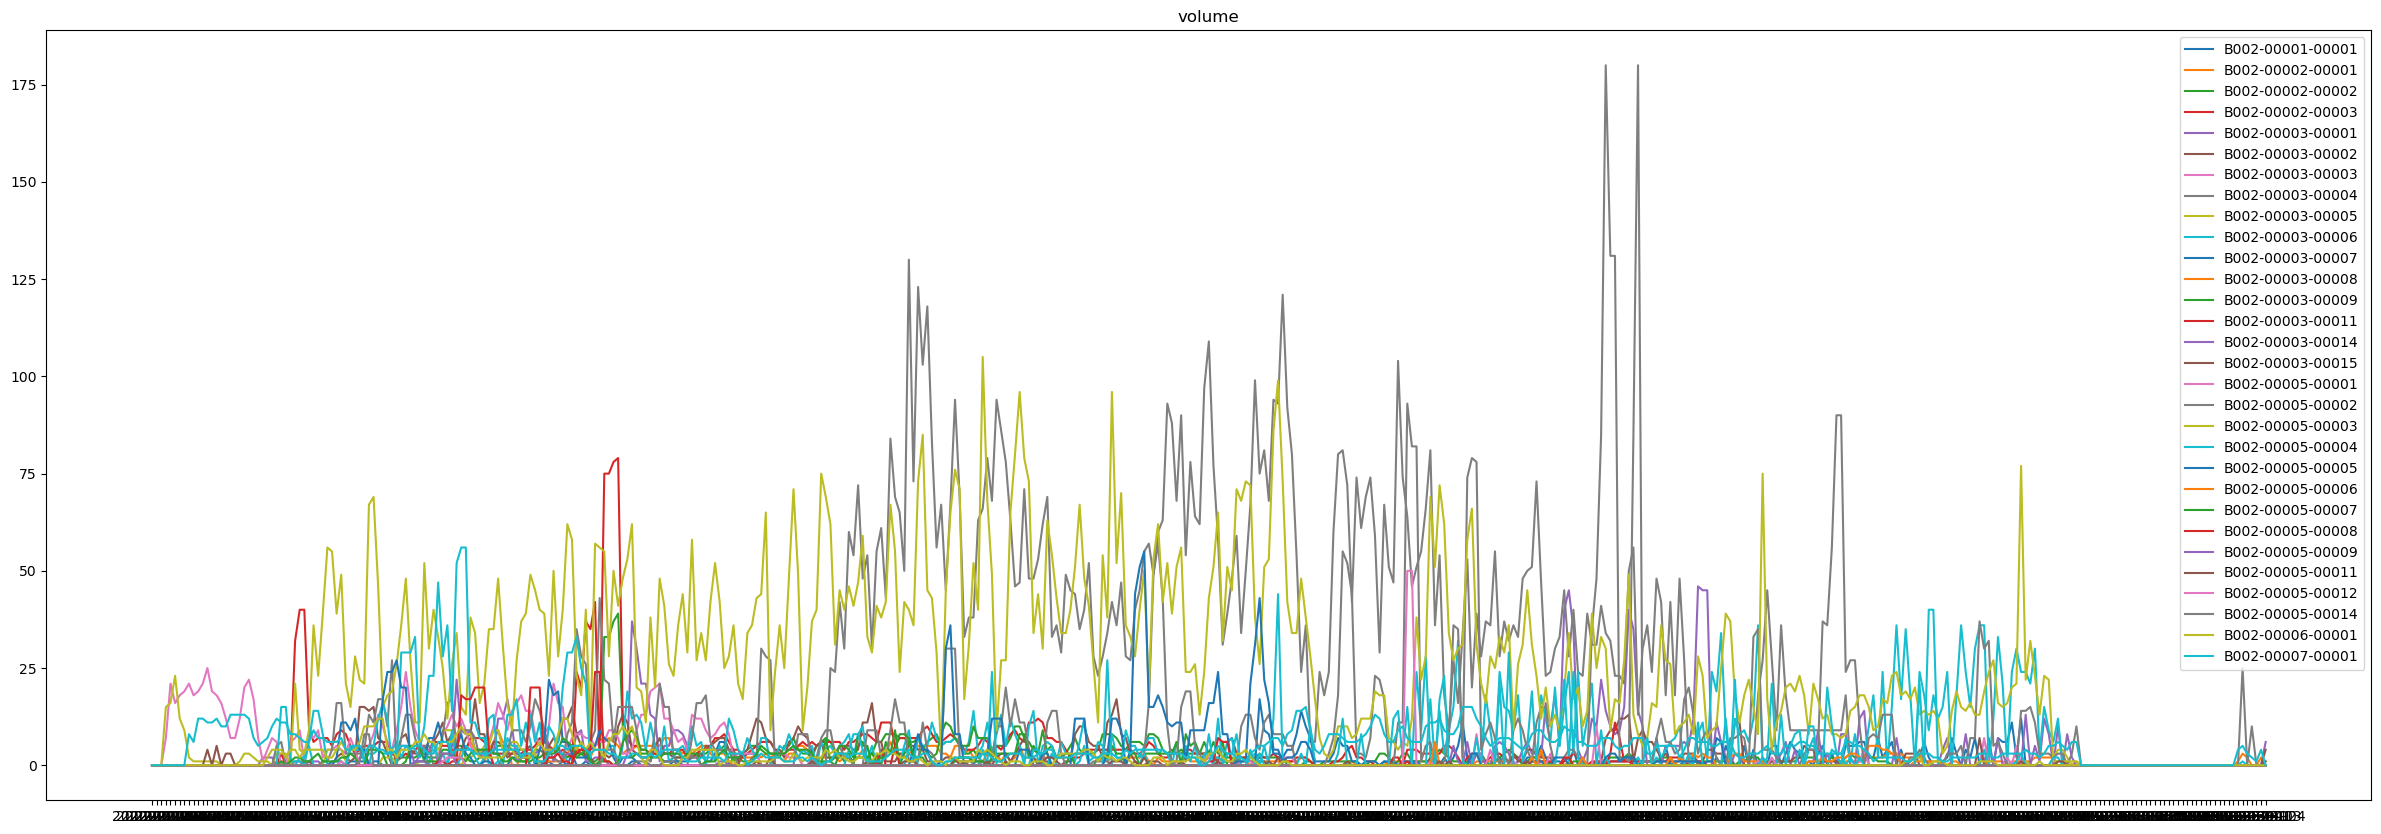

In [49]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
plt.figure(figsize=(30, 10))
plt.title('prices')
for i in range(0, 30):
    product_name = re.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(re.columns[1:], re.iloc[i, 1:], label=product_name)

plt.legend()  # 범례 추가
plt.show()

# 두 번째 그래프
plt.figure(figsize=(30, 10))
plt.title('volume')
for i in range(0, 30):
    product_name = train.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(train.columns[1:], train.iloc[i, 1:], label=product_name)

plt.legend()  # 범례 추가
plt.show()

# 100개

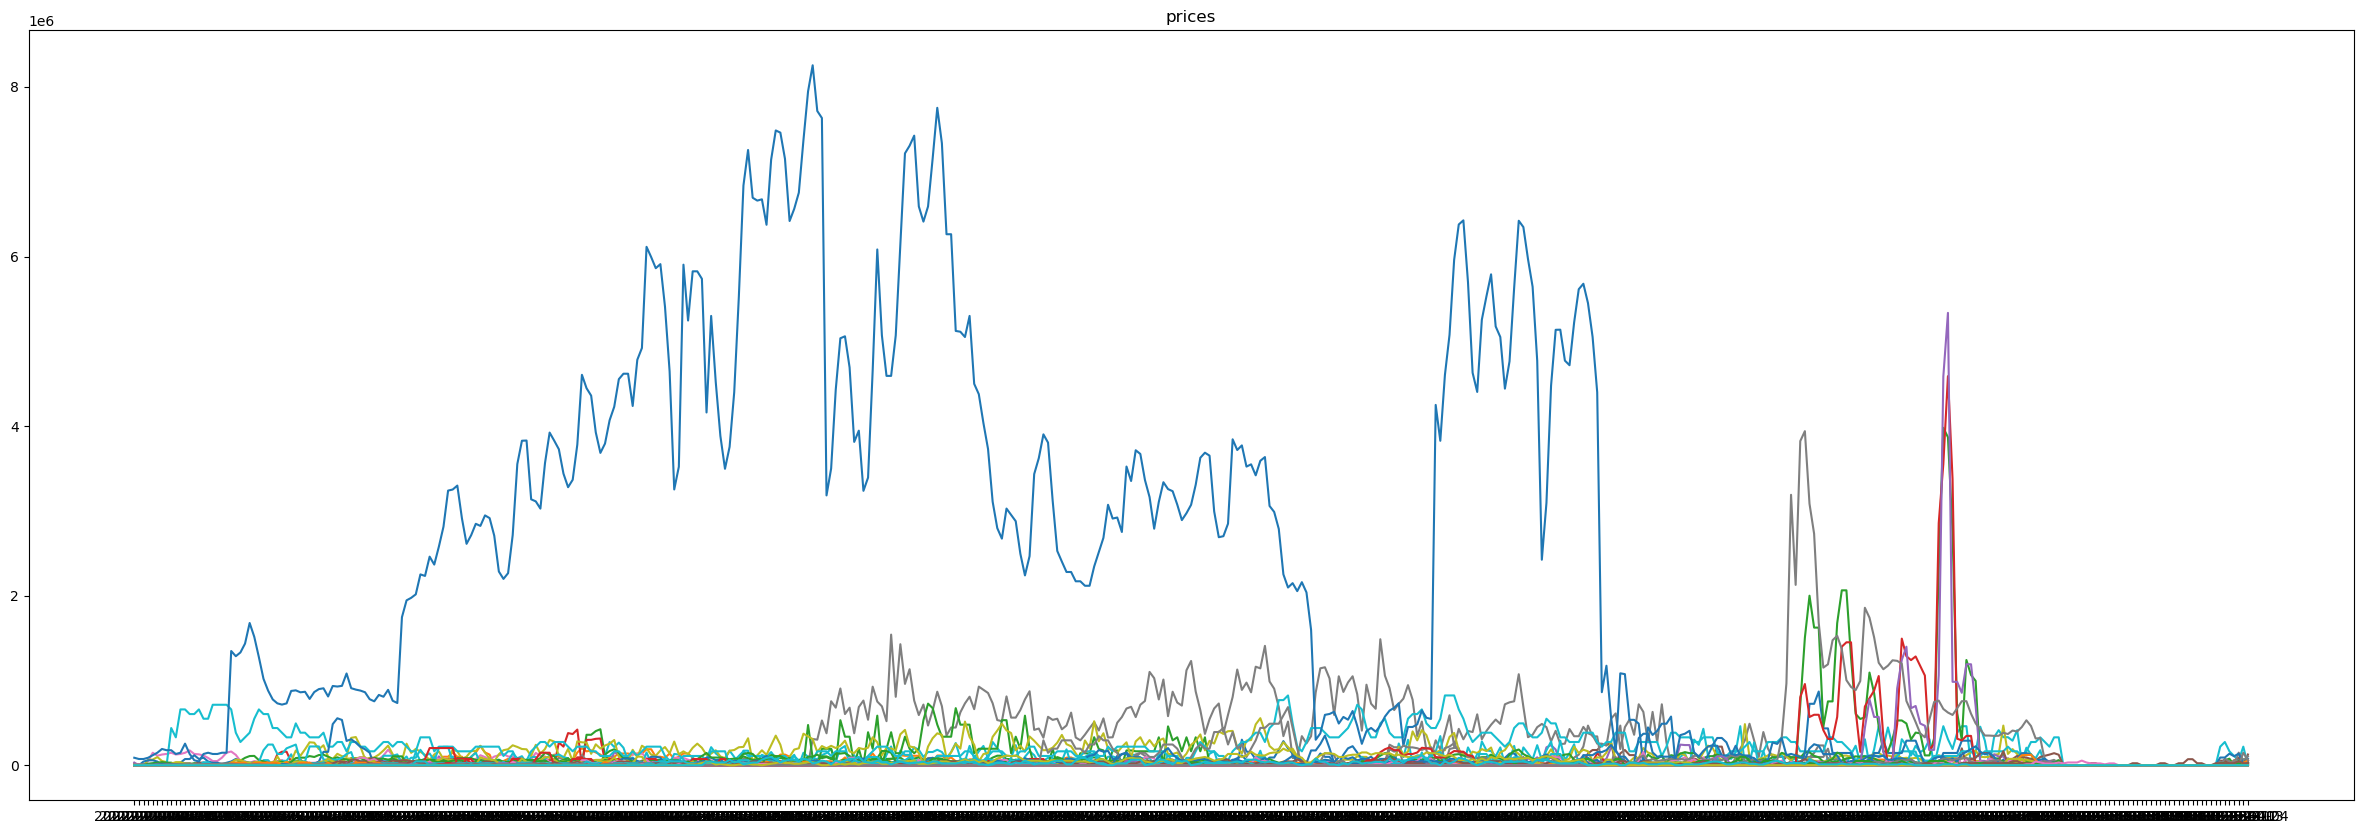

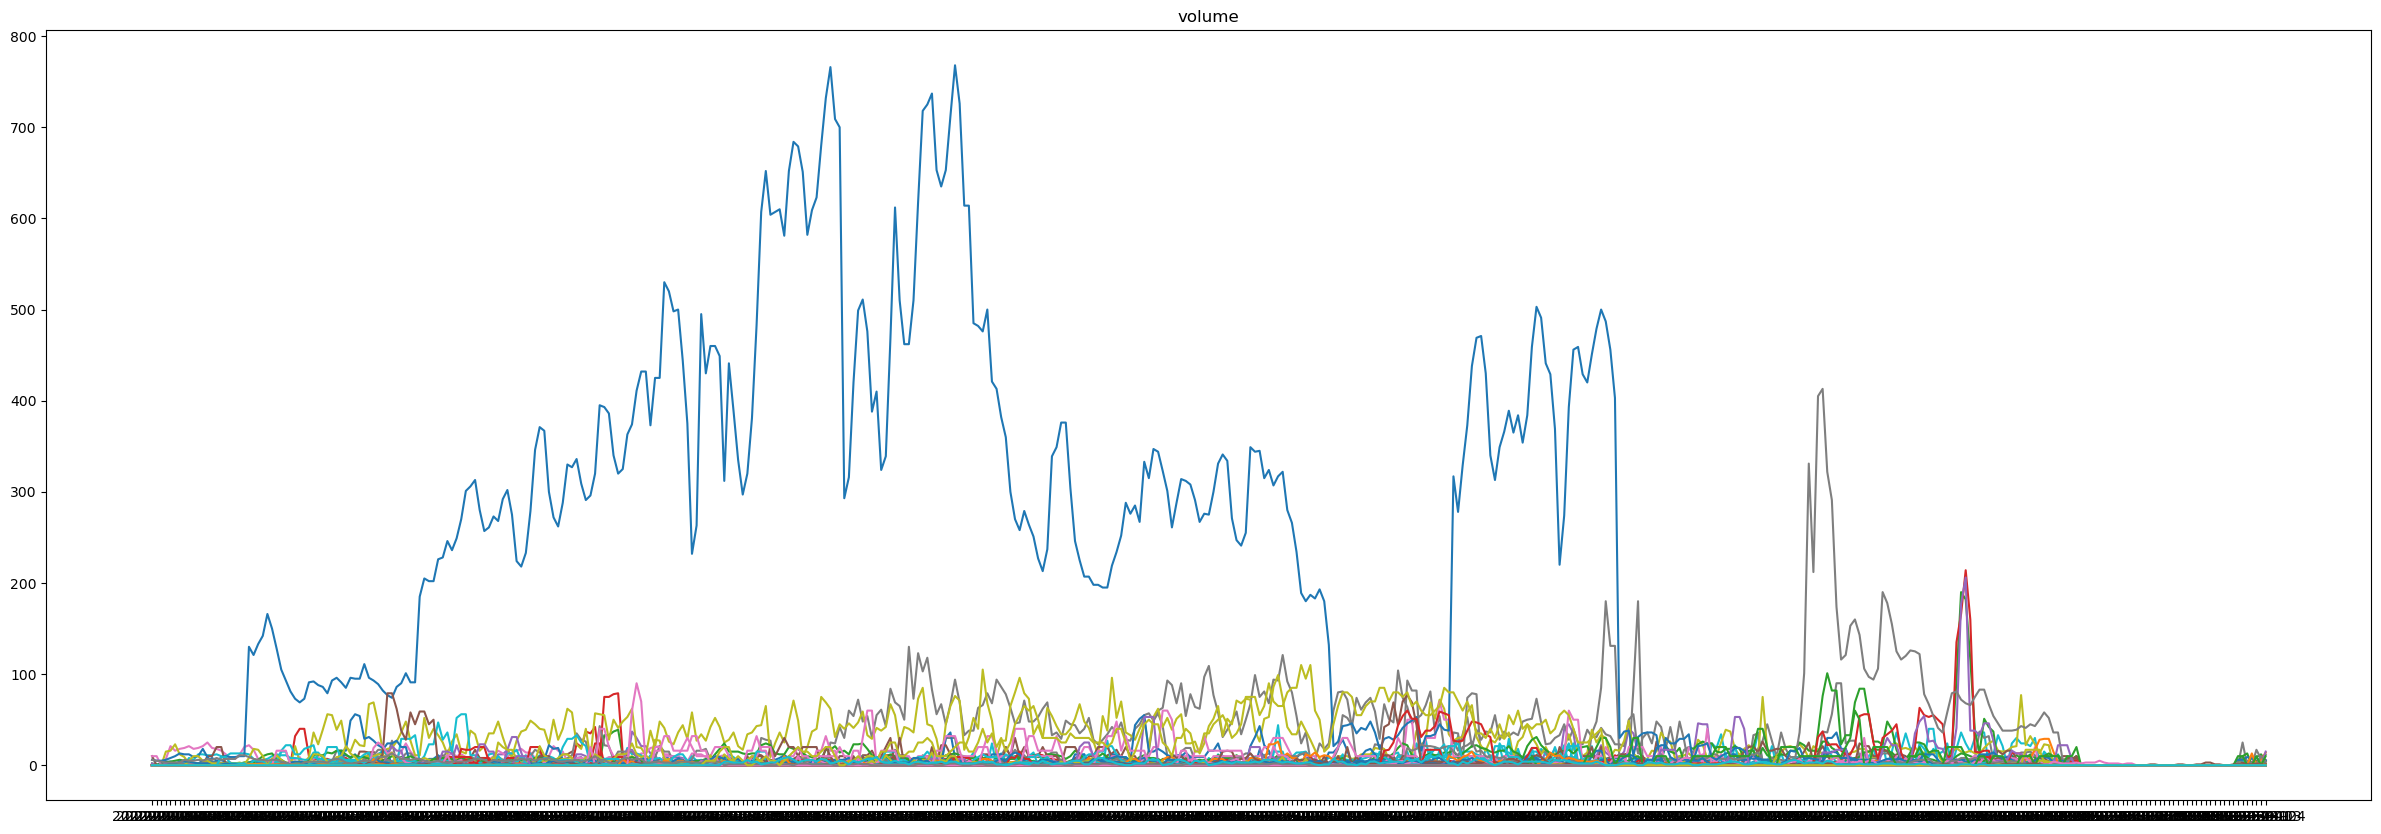

In [51]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
plt.figure(figsize=(30, 10))
plt.title('prices')
for i in range(0, 100):
    product_name = re.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(re.columns[1:], re.iloc[i, 1:], label=product_name)

#plt.legend()  # 범례 추가
plt.show()

# 두 번째 그래프
plt.figure(figsize=(30, 10))
plt.title('volume')
for i in range(0, 100):
    product_name = train.iloc[i, 0]  # 각 행의 제품 이름
    plt.plot(train.columns[1:], train.iloc[i, 1:], label=product_name)

#plt.legend()  # 범례 추가
plt.show()

# 작은 표본으로는 판매령이 가격상승과 관련 없어 보임. 오히려 비슷한 양상